Questo notebook è una variante estesa del precedente BMI-plots.ipynb. In questo caso, **il dataset è un dataset reale e presenta un livello di complessità chiaramente superiore a quello usato in precedenza** (che conteneva valori creati casualmente, quindi i risultati non avevano nessun significato reale). In questo caso invece i dati sono la fotografia di una popolazione e pertanto l'analisi che se ne può ricavare è significativa.

La sorgente dei dati è: il **2018 BRFSS Survey Data and Documentation (Behavioral Risk Factor Surveillance System)** (https://www.cdc.gov/brfss/annual_data/annual_2018.html), un rilevantissimo survey annuale realizzato dal CDC (Center for Disease Control and Prevention) degli Stati Uniti. È di dimensioni rilevanti: circa 440.000 righe per 2032 variabili.

È necessaria quindi una fase preliminare di lettura dei documenti che lo accompagnano dove vengono presentate le metodologie di costruzione del dataset, una scheda di dettaglio per ogni variabile, l'elenco delle variabili calcolate da altre variabili primarie , etc.

Qui si presenta solo un esempio sulla falsariga di quanto già fatto in precedenza con il calcolo del BMI (notare che il BMI è tra le variabili calcolate presenti nel dataset). Naturalmente la ricchezza del dataset consente infinite altre analisi, di maggiore rilevanza. 
A tutti gli studenti si suggerisce di lavorare sulle variabili di questo dataset immaginando altre tipi di analisi che potrebbero essere ricavate, riguardanti i molti fattori comportamentali e di rischio che sono censiti, rispetto a fenomeni sociali legati alla marginalità, cure sanitarie, dipendenze, anzianità, fattori territoriali, etnici, genere, orientamento sessuale etc.
Con questo caso si esce dagli esempi semplificati di dataset utili esclusivamente per provare nuove funzionalitá e si affronta un caso di studio reale in tutta la sua complessità e ricchezza di informazioni. Occorre quindi un diverso approccio, metodico, analitico, e anche creativo per pensare a quali nuove informazioni e conoscenza questi dati possono offrire. 

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns;

Ho importato le librerie necessarie.
Ora leggo il dataset. È in formato XPT, che è un formato proprietario di SAS (https://www.sas.com/it_it/home.html). SAS è azienda leader negli strumenti di analisi e gestione di dati, produttrice di uno dei tool commerciali più noti e diffusi. 
Python (e anche R) possono leggere dataset nei formati proprietari di SAS (.sas e .xpt).
L'operazione di lettura richiederà un certo tempo per essere completata, vista la dimensione del dataset.
Per questo conviene tenerla in una cella da sola, in modo da non doverla rieseguire se non strettamente necessario (ad esempio quando si devono eseguire le istruzioni successive di selezione delle colonne non serve rileggere nuovamente i dati dal dataset originale, esiste già la copia nella variabile locale (qui data1))

In [2]:
data1 = pd.read_sas('../data/LLCP2018.XPT')

In [3]:
peso_alt1 = pd.DataFrame(data1, columns=['SEX1', 'HTM4', 'WTKG3'])
peso_alt1['WTKG3']=peso_alt1['WTKG3']/100
print(peso_alt1)

        SEX1   HTM4  WTKG3
0        2.0  163.0  58.97
1        2.0  165.0  90.72
2        2.0  147.0  64.41
3        1.0  178.0  86.18
4        2.0  160.0    NaN
...      ...    ...    ...
437431   2.0  157.0  44.45
437432   2.0  157.0    NaN
437433   2.0  152.0  70.76
437434   2.0  155.0  62.14
437435   2.0  178.0  87.09

[437436 rows x 3 columns]


In [6]:
peso_alt1.iloc[:,0]=peso_alt1.iloc[:,0].astype('str') 
peso_alt1.iloc[:,0]=peso_alt1.iloc[:,0].replace('2.0', "female")
peso_alt1.iloc[:,0]=peso_alt1.iloc[:,0].replace('1.0', "male")
peso_alt1.iloc[:,0]=peso_alt1.iloc[:,0].replace('7.0', "don't know/not sure")
peso_alt1.iloc[:,0]=peso_alt1.iloc[:,0].replace('9.0', "refused")
print(peso_alt1.iloc[:,0])

0         female
1         female
2         female
3           male
4         female
           ...  
437431    female
437432    female
437433    female
437434    female
437435    female
Name: SEX1, Length: 437436, dtype: object


In [7]:
peso_alt = peso_alt1.rename(columns={"SEX1":"Gender","HTM4": "Height", "WTKG3": "Weight"})
peso_alt.head()

,Gender,Height,Weight
0,female,163.0,58.97
1,female,165.0,90.72
2,female,147.0,64.41
3,male,178.0,86.18
4,female,160.0,NaN


Ho letto il csv e definito il data frame con le colonne che mi servono

In [8]:
peso_alt[peso_alt.isna().any(axis=1)]

,Gender,Height,Weight
4,female,160.0,NaN
44,female,157.0,NaN
61,male,NaN,NaN
69,female,168.0,NaN
71,female,160.0,NaN
...,...,...,...
437262,female,NaN,NaN
437320,female,NaN,68.04
437358,female,NaN,43.54
437406,male,NaN,NaN


In [9]:
#elimino le righe con NaN
peso_alt=peso_alt.dropna()

In [10]:
def BMI_calc(altezza, peso):
    BMI= peso//((altezza/100)**2)
    return BMI
peso_alt.insert(3, "BMI", BMI_calc(peso_alt.Height, peso_alt.Weight), True)
#forma alternativa: peso_alt['BMI']=peso_alt.Weight/(peso_alt.Height/100)**2)
peso_alt

,Gender,Height,Weight,BMI
0,female,163.0,58.97,22.0
1,female,165.0,90.72,33.0
2,female,147.0,64.41,29.0
3,male,178.0,86.18,27.0
5,female,157.0,78.02,31.0
...,...,...,...,...
437430,female,160.0,77.11,30.0
437431,female,157.0,44.45,18.0
437433,female,152.0,70.76,30.0
437434,female,155.0,62.14,25.0


In [11]:
print("STATISTICHE ALTEZZA")
print("Media Altezza (tutti): ", np.mean(peso_alt.Height))
print("Mediana Altezza: ", np.median(peso_alt.Height))
print("Max Altezza: ", np.max(peso_alt.Height))
print("Min Altezza: ", np.min(peso_alt.Height))
print("25th percentile:   ", np.percentile(peso_alt.Height, 25))
print("50th percentile:   ", np.percentile(peso_alt.Height, 50))
print("75th percentile:   ", np.percentile(peso_alt.Height, 75))
print("95th percentile:   ", np.percentile(peso_alt.Height, 95))
print("99th percentile:   ", np.percentile(peso_alt.Height, 99))

print("STATISTICHE PESO")
print("Media Peso (tutti): ", np.mean(peso_alt.Weight))
print("Mediana Peso: ", np.median(peso_alt.Weight))
print("Max Peso: ", np.max(peso_alt.Weight))
print("Min Peso: ", np.min(peso_alt.Weight))
print("25th percentile:   ", np.percentile(peso_alt.Weight, 25))
print("50th percentile:   ", np.percentile(peso_alt.Weight, 50))
print("75th percentile:   ", np.percentile(peso_alt.Weight, 75))
print("95th percentile:   ", np.percentile(peso_alt.Weight, 95))
print("99th percentile:   ", np.percentile(peso_alt.Weight, 99))

STATISTICHE ALTEZZA
Media Altezza (tutti):  170.06957708386383
Mediana Altezza:  170.0
Max Altezza:  241.0
Min Altezza:  91.0
25th percentile:    163.0
50th percentile:    170.0
75th percentile:    178.0
95th percentile:    188.0
99th percentile:    193.0
STATISTICHE PESO
Media Peso (tutti):  82.00736522259909
Mediana Peso:  79.38
Max Peso:  293.93
Min Peso:  22.68
25th percentile:    68.04
50th percentile:    79.38
75th percentile:    92.99
95th percentile:    119.29
99th percentile:    145.15


In [12]:
peso_alt.to_csv('../data/Es2plot_BMI.csv', columns=['Gender', 'Height', 'Weight','BMI'])
!head -4 ../data/Es2plot_BMI.csv

,Gender,Height,Weight,BMI
0,female,163.0,58.97,22.0
1,female,165.0,90.72,33.0
2,female,147.0,64.41,29.0


Creiamo una funzione specifica per calcolare il BMI dato il peso e l'altezza. BMI si calcola facendo il peso (in kg.) diviso l'altezza (in m.) al quadrato. (BMI=peso (in kg.)/(altezza (in m.)**2).
Poi inseriamo una nuova colonna nel dataset che chiamiamo BMI con il risultato del calcolo.

In [13]:
peso_alt.to_csv('../data/Es2plot_BMI.csv')
!head -4 ../data/Es2plot_BMI.csv

,Gender,Height,Weight,BMI
0,female,163.0,58.97,22.0
1,female,165.0,90.72,33.0
2,female,147.0,64.41,29.0


Salvo il dataset modificato con nuovo nome.
Ora usiamo delle funzioni di visualizzazione per produrre grafici di tipo diverso ed esercitarci con l'uso sia dei Jupyter notebook sia con funzioni Python (matplotlib, seaborn) che dovrebbero ricordare molto quelle già note di R (ggplot)

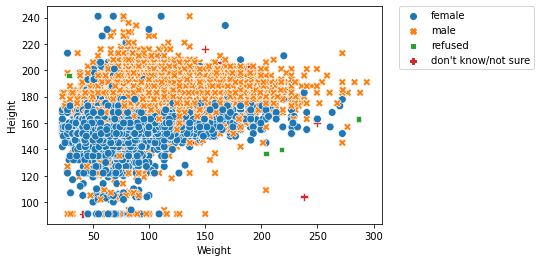

In [14]:
sns.scatterplot(data=peso_alt, x="Weight", y="Height", hue="Gender", style="Gender", s=60)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

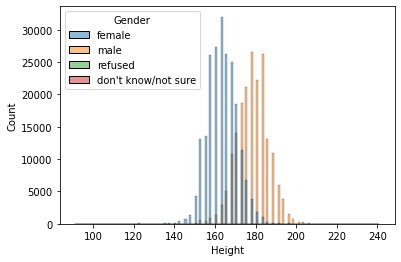

In [15]:
sns.histplot(data=peso_alt, x="Height", binwidth=1, stat="count", hue="Gender")
plt.show()

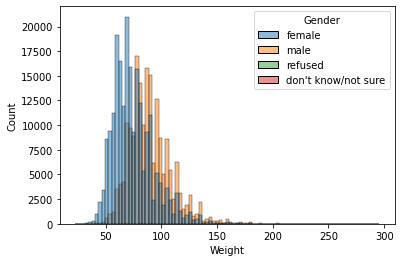

In [16]:
sns.histplot(data=peso_alt, x="Weight", binwidth=3, stat="count", hue="Gender")
plt.show()

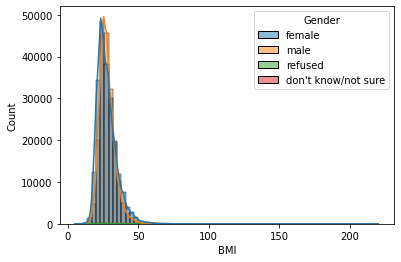

In [17]:
sns.histplot(data=peso_alt, x="BMI", binwidth=3, stat="count", hue="Gender", kde="true")
plt.show()

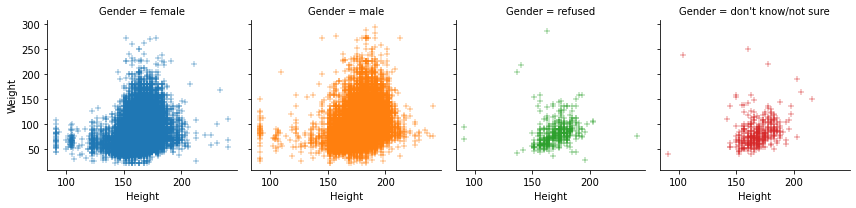

In [18]:
g = sns.FacetGrid(peso_alt, col="Gender", hue="Gender")
g.map(sns.scatterplot, "Height", "Weight", marker="+")

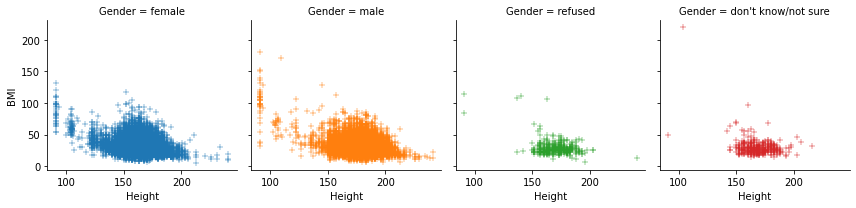

In [19]:
g = sns.FacetGrid(peso_alt, col="Gender", hue="Gender")
g.map(sns.scatterplot, "Height", "BMI", marker="+")

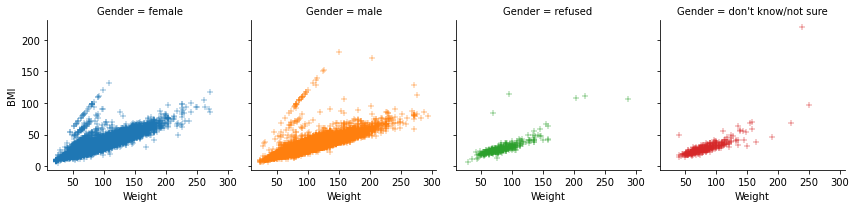

In [20]:
g = sns.FacetGrid(peso_alt, col="Gender", hue="Gender")
g.map(sns.scatterplot, "Weight", "BMI", marker="+")

Ora quello che vogliamo fare è usare una variabile continua (Weight) con un tipo di grafico (boxplot) che invece lavora su variabili categoriche, quindi su gruppi di punti invece che su valori singoli. La tecnica è di definire intervalli di valori.
Ci sono due modi principali:
- definisco quanti intervalli voglio e il range di valori tra i quali la variabile continua varia viene diviso nel numero di intervalli. Ad esempio, decido che per i pesi delle persone, voglio visualizzare 10 intervalli. Supponendo che il mio campione vari tra 50 e 100kg otterrò 10 intervalli da 5 kg l’uno (50-55; 56-60 etc.). Questo ha il vantaggio di definire intervalli di uguale lunghezza, ma il numero di punti per ogni intervallo varierà, per cui ad esempio potrei avere solo una persona che pesa tra 50 e 54 e solo una tra 95-100, mentre la maggior parte saranno concentrate in pochi gruppi.
Questo lo fa la funzione **cut(), intervalli di dimensione uguali ma numerosità dei punti diversa sugli intervalli (a meno di distribuzione uniforme dei valori su tutto il range)**.
- viceversa posso invece volere intervalli con numero di punti uguale (o molto simile). In questo caso uso i quantili della distribuzione, (**quantili** è il termine generico, **percentili** se la si divide in 100, **decili** in 10, **quartili** in 4). Nell’esempio specifico 10, quindi sono decili e ogni gruppo contiene il 10% dei punti (definendo 100 sarebbero stati percentili, ognuno con l'1% dei punti, se specificavo 4 sarebbero stati quartili ognuno con il 25% dei punti). Nel caso dei pesi, la cui distribuzione verosimilmente non è uniforme su tutto l'intervallo, ma più frequente per pesi centrali e meno frequente verso gli estremi, i decili estremi corrisponderanno a intervalli più ampi perché per raggruppare il 10% dei punti serve un intervallo maggiore, mentre i decili centrali (o dove i pesi sono più frequenti) corrisponderanno a intervalli di pesi inferiori.
Questo fa la funzione **qcut(), intervalli di numerosità uguale (o molto simile) ma dimensione degli intervalli differente (a meno di distribuzione uniforme dei valori su tutto il range)**.

La terza ipotesi è quella di definire in maniera soggettiva tutti i tagli uno per uno, per cui decido per mie ragioni che voglio 50-60, 60-63-64-65 66-75 etc. DI solito questo non si fa propri perché i risultati sono completamente dipendenti da una suddivisione arbitraria.

Qui spiega bene l’uso e la differenza tra qcut e cut: https://pbpython.com/pandas-qcut-cut.html

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(1, 0, '0-10%'),
  Text(2, 0, '10-20%'),
  Text(3, 0, '20-30%'),
  Text(4, 0, '30-40%'),
  Text(5, 0, '40-50%'),
  Text(6, 0, '50-60%'),
  Text(7, 0, '60-70%'),
  Text(8, 0, '70-80%'),
  Text(9, 0, '80-90%'),
  Text(10, 0, '90-100%')])

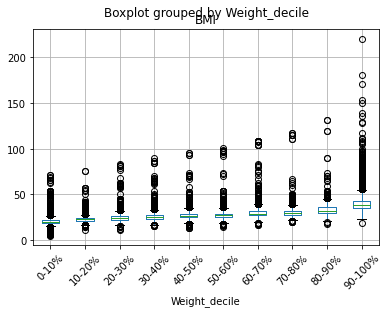

In [21]:
peso_alt['Weight_decile'] = pd.qcut(peso_alt['Weight'], 10, labels=['0-10%', '10-20%','20-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70-80%', '80-90%', '90-100%'])
peso_alt.boxplot(column='BMI', by='Weight_decile')
plt.xticks(rotation=45)

In [22]:
peso_alt

,Gender,Height,Weight,BMI,Weight_decile
0,female,163.0,58.97,22.0,0-10%
1,female,165.0,90.72,33.0,60-70%
2,female,147.0,64.41,29.0,20-30%
3,male,178.0,86.18,27.0,60-70%
5,female,157.0,78.02,31.0,40-50%
...,...,...,...,...,...
437430,female,160.0,77.11,30.0,40-50%
437431,female,157.0,44.45,18.0,0-10%
437433,female,152.0,70.76,30.0,30-40%
437434,female,155.0,62.14,25.0,10-20%


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]),
 [Text(1, 0, '(22.409, 36.242]'),
  Text(2, 0, '(36.242, 49.805]'),
  Text(3, 0, '(49.805, 63.368]'),
  Text(4, 0, '(63.368, 76.93]'),
  Text(5, 0, '(76.93, 90.492]'),
  Text(6, 0, '(90.492, 104.055]'),
  Text(7, 0, '(104.055, 117.618]'),
  Text(8, 0, '(117.618, 131.18]'),
  Text(9, 0, '(131.18, 144.742]'),
  Text(10, 0, '(144.742, 158.305]'),
  Text(11, 0, '(158.305, 171.868]'),
  Text(12, 0, '(171.868, 185.43]'),
  Text(13, 0, '(185.43, 198.992]'),
  Text(14, 0, '(198.992, 212.555]'),
  Text(15, 0, '(212.555, 226.118]'),
  Text(16, 0, '(226.118, 239.68]'),
  Text(17, 0, '(239.68, 253.242]'),
  Text(18, 0, '(253.242, 266.805]'),
  Text(19, 0, '(266.805, 280.368]'),
  Text(20, 0, '(280.368, 293.93]')])

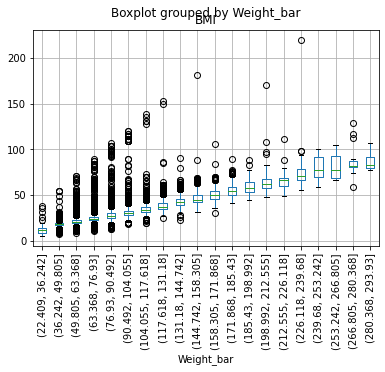

In [23]:
#peso_alt['Weight_decile'] = pd.cut(peso_alt['Weight'], 10, labels=['0-10%', '10-20%','20-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70-80%', '80-90%', '90-100%'])
peso_alt['Weight_bar'] = pd.cut(peso_alt['Weight'], 20)
peso_alt.boxplot(column='BMI', by='Weight_bar')
plt.xticks(rotation=90)

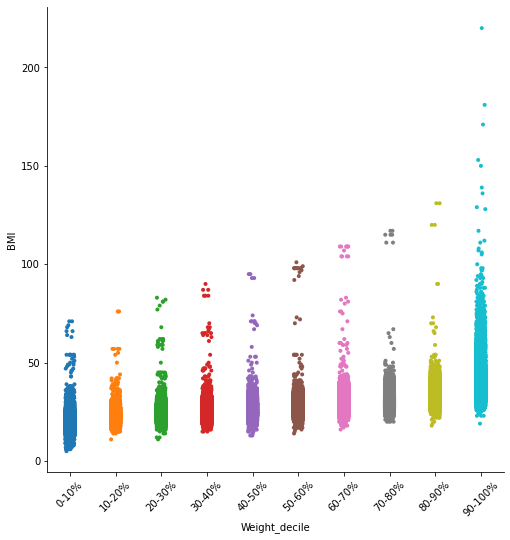

In [43]:

#peso_alt['Weight_decile'] = pd.qcut(peso_alt['Weight'], 10, labels=['0-10%', '10-20%','20-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70-80%', '80-90%', '90-100%'])
#sns.boxplot(x="Weight_decile", y="BMI", hue="Gender", data=peso_alt)
sns.catplot(x="Weight_decile", y="BMI", data=peso_alt, height=7, s=4)
#sns.catplot(x="Weight_decile", y="BMI", data=peso_alt, kind="violin")
#sns.catplot(x="Weight_decile", y="BMI", hue="Gender", data=peso_alt, kind="box")
#sns.catplot(x="Weight_decile", y="BMI", hue="Gender", data=peso_alt, kind="box", col="Gender")
#sns.catplot(x="Weight_decile", y="BMI", hue="Gender", data=peso_alt, kind="point")
plt.xticks(rotation=45)
plt.show()